In [1]:
import yfinance as yf 
import datetime 
import pandas as pd 
import numpy as np 
pd.core.common.is_list_like = pd.api.types.is_list_like #
import pandas_datareader as pdr 
yf.pdr_override()
import matplotlib.pyplot as plt

# Task1

In [2]:
start = datetime.datetime(2017, 1, 1) 
end = datetime.datetime(2018, 1, 1)

In [3]:
def get_tickers():
    f = open('Stocks.txt')
    tickers = []
    for line in f:
        tickers.append(line[0:len(line)-1])
    f.close()
    return tickers

def data_for_ticker(ticker):
    return yf.download([ticker], start=start, end=end)

In [4]:
def generate_frames():
    f = open('Stocks.txt')
    frames = dict()
    for line in f:
        ticker = line[0:len(line)-1]
        frames[ticker] = data_for_ticker(ticker)
    f.close()
    return frames

def get_frame(ticker, frames):
    return frames[ticker]

In [5]:
allTickers = get_tickers()

In [6]:
allFrames = generate_frames()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

# Task2

In [7]:
def compute_return(frames):
    for ticker in frames:
        frame = frames[ticker]
        pt = frame["Adj Close"][1:].values
        pt_1 = frame["Adj Close"][:-1].values
        ret = np.log(pt / pt_1)
        frames[ticker]["Return"] = [np.NaN, *ret]
        
        #####################
        Ticker = yf.Ticker(ticker)
        frames[ticker]["Exchange"] = Ticker.info['fullExchangeName']
        
compute_return(allFrames)

In [8]:
def get_return_info(ticker):
    E = np.mean(allFrames[ticker]["Return"])
    sigma = np.std(allFrames[ticker]["Return"])
    return E, sigma

In [9]:
allReturns = []
allRisks = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    allReturns.append(ret)
    allRisks.append(risk)

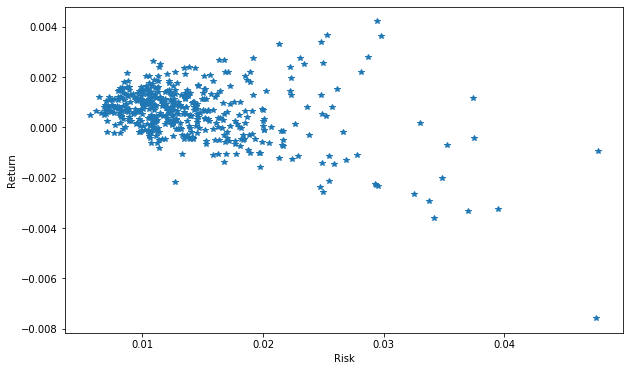

In [10]:
plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(allRisks, allReturns,"*")
plt.show()

# Task 3 (put your code below)

# Task 4 

In [11]:
import copy


def find_good_actives(risks,returns,count):
    #return -> max
    return_count = count // 3
    ret = copy.deepcopy(returns)
    return_indices = find_max_ret(return_count,ret,[])
    #risk -> min
    risk = copy.deepcopy(risks)
    risk_indices = find_min_risk(count - return_count, risk,[])
    return [allTickers[index] for index in return_indices + risk_indices]

def find_max_ret(count,returns,accum):
    if count != 0:
        max_ret = allReturns.index(max(returns))
        returns.remove(allReturns[max_ret])
        accum.append(max_ret)
        find_max_ret(count - 1, returns, accum)
    return accum
    
def find_min_risk(count,risks,accum):
    #print("Count {}\nAccum {}\n".format(count,accum))
    if count != 0:
        min_risk = allRisks.index(min(risks))
        risks.remove(allRisks[min_risk])
        accum.append(min_risk)
        find_min_risk(count - 1, risks, accum)
    return accum

In [12]:
def plot_for_tickers(Tickers):
    rets=[]
    risks=[]
    for tick in Tickers:
        ret,risk = get_return_info(tick)
        rets.append(ret)
        risks.append(risk)
    
    plt.figure(figsize=(10,6))
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.plot(risks, rets,"*")
    plt.show()

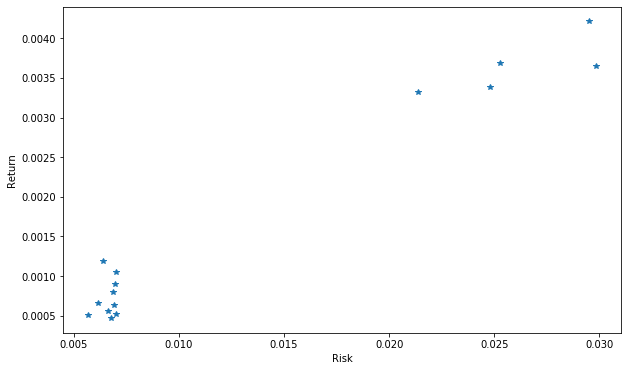

In [13]:
Tickers = find_good_actives(allRisks,allReturns,15)
plot_for_tickers(Tickers)
#Technology - MFGP        !
#Financial Services - BHF !
#Technology -YY           !
#Technology -SQ           
#Technology - WB
#Consumer Defensive - KO  !
#Consumer Defensive - PEP !
#Industrials - HON        !
#Basic Materials - ECL    !
#Consumer Defensive -PG
#Utilities - XEL          !
#Financial Services - CMS !
#Industrials - WM         !  
#Healthcare - PFE         !
#Industrials - LMT        

#Tech - MFGP,YY
#Fin - BHF,CMS
#Consumer - KO,PEP
#Industrials - HON, WM
#BasicMat - ECL
#HealthCare - PFE

/home/artem/anaconda3/envs/stonks/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


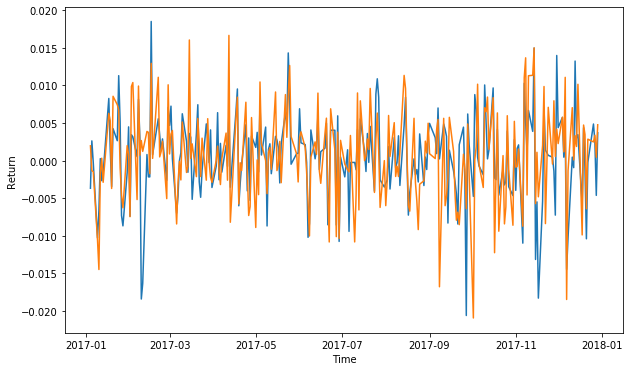

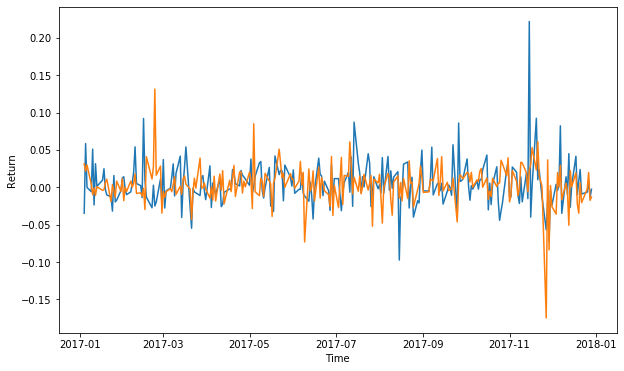

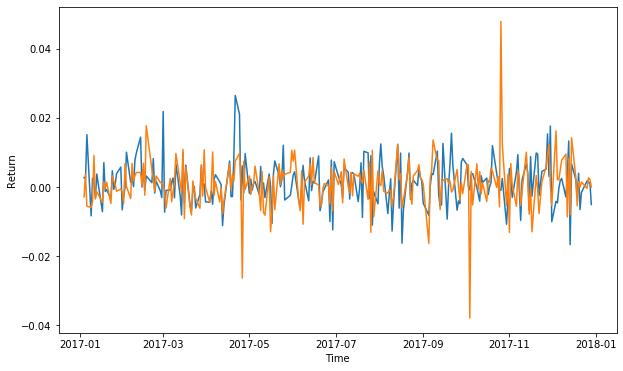

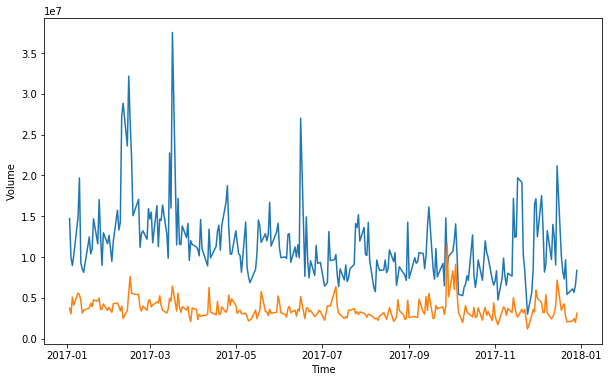

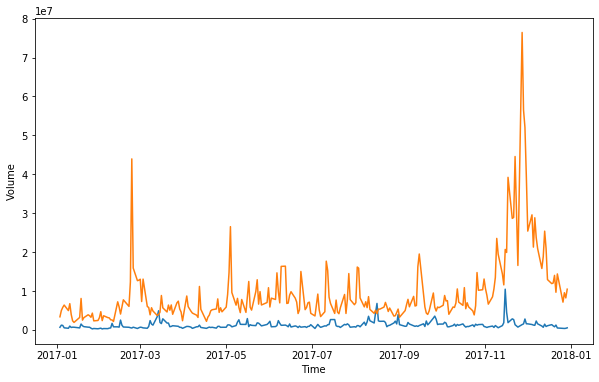

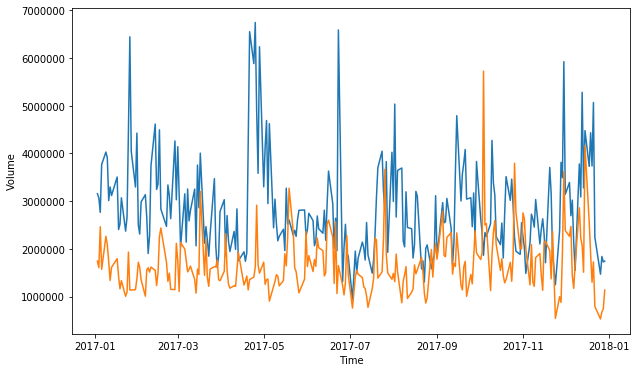

In [14]:
def plot_smth(Tickers,Column):
    plt.figure(figsize=(10,6))
    plt.xlabel("Time")
    plt.ylabel(Column)
    for Ticker in Tickers:
        returns = allFrames[Ticker][Column]
        array = returns.values
        time = returns.index.values
        plt.plot(time, array)
    plt.show()

plot_smth(['KO','PEP'],"Return") # Customer
plot_smth(['YY','SQ'], "Return") # Tech
#plot_smth(['BHF','CMS'], "Return") # Finance
plot_smth(['HON','WM'], "Return") # Industrials


plot_smth(['KO','PEP'],"Volume") # Customer
plot_smth(['YY','SQ'], "Volume") # Tech
#plot_smth(['BHF','CMS'], "Volume") # Finance
plot_smth(['HON','WM'], "Volume") # Industrials

# Task 5

In [15]:
returns = []
for tick in allTickers:
    ret,risk = get_return_info(tick)
    returns.append([ret, tick, allFrames[tick].shape[0]])
returns.sort()
returns[:7], returns[-7:]

([[-0.00758010431286513, 'FTR', 251],
  [-0.0036014016149225458, 'AVP', 251],
  [-0.0033194378295422692, 'MNK', 251],
  [-0.0032511691231228356, 'ENDP', 251],
  [-0.0029101810377689568, 'UAA', 251],
  [-0.002638224944495637, 'UA', 251],
  [-0.002574624706890495, 'RRC', 251]],
 [[0.002775471605247454, 'MLCO', 251],
  [0.0027987403755705574, 'FSLR', 251],
  [0.0033169373974853674, 'ALGN', 251],
  [0.0033821305394505373, 'NRG', 251],
  [0.003649150173095645, 'WB', 251],
  [0.003681927169102927, 'SQ', 251],
  [0.004211538415821046, 'YY', 251]])

## Зависимость между доходностями
### Разные производственные сектора

In [16]:
import numpy as np 
ticker1 = "SWN" # energy, very low return
ticker2 = "ALGN" # healthcare, very high return

In [17]:
def get_correlation_return(tic1, tic2):
    ret1 = allFrames[tic1]["Return"][1:]
    ret2 = allFrames[tic2]["Return"][1:]
    print("Correlation between {} and {} returns is {:.2f}".format(tic1, tic2, np.corrcoef(ret1,ret2)[0,1]))
    plt.scatter(ret1,ret2, c = 'green')
    plt.xlabel("Ticker 1")
    plt.ylabel("Ticker 2")
    plt.show()

Correlation between SWN and ALGN returns is -0.02


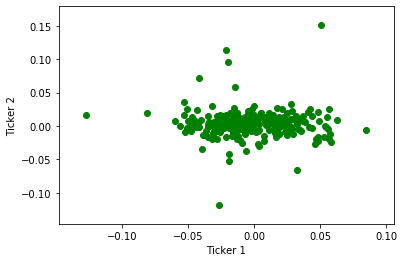

In [18]:
get_correlation_return("SWN","ALGN") # energy and healthcare, wide gap between returns

Correlation between ALGN and NRG returns is 0.10


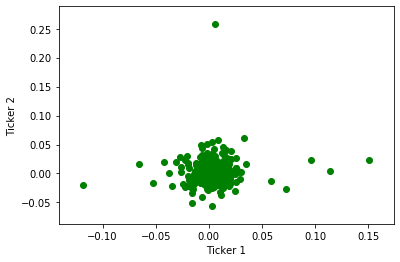

In [19]:
get_correlation_return("ALGN","NRG") # healthcare and utilities(energy), narrow gap between returns

### Один производственный сектор

Correlation between MNK and ALGN returns is -0.00


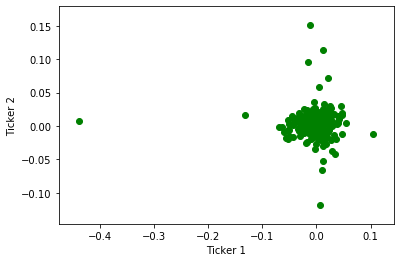

In [20]:
get_correlation_return("MNK", "ALGN") # healthcare, wide gap between returns

Correlation between SQ and YY returns is 0.21


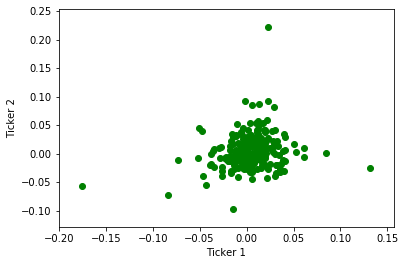

In [21]:
get_correlation_return("SQ", "YY") # technology, narrow gap between returns

Correlation between FB and GOOGL returns is 0.70


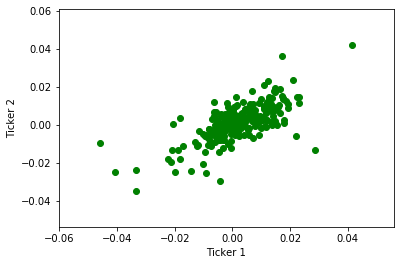

In [22]:
get_correlation_return("FB", "GOOGL") #Facebook and google, technology

## Зависимость между доходностями и объемами продаж

In [23]:
def get_cor_return_volume(tic):
    ret = allFrames[tic]["Return"][1:]
    volume = allFrames[tic]["Volume"][1:]
    print("Correlation between return and volume of {} is {:.2f}".format(tic, np.corrcoef(ret,volume)[0,1]))
    plt.scatter(ret,volume, c = 'green')
    plt.xlabel("Return")
    plt.ylabel("Volume")
    plt.show()

Correlation between return and volume of INTC is 0.23


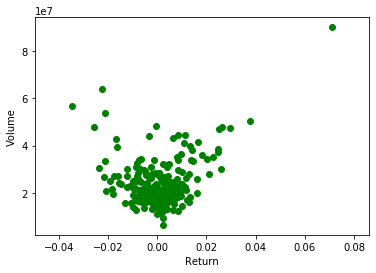

In [24]:
#technology
get_cor_return_volume("INTC") 

Correlation between return and volume of XOM is 0.07


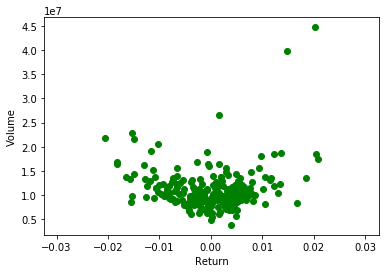

In [25]:
#energy
get_cor_return_volume("XOM") 

Correlation between return and volume of VZ is 0.04


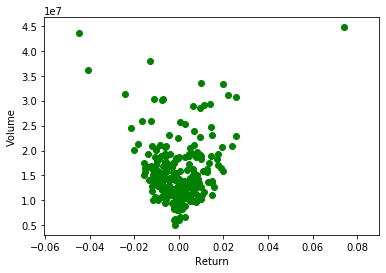

In [26]:
# Communication Services
get_cor_return_volume("VZ") 

Correlation between return and volume of JNJ is 0.12


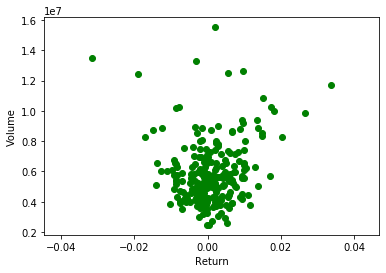

In [27]:
# Healthcare
get_cor_return_volume("JNJ") 

Correlation between return and volume of V is 0.06


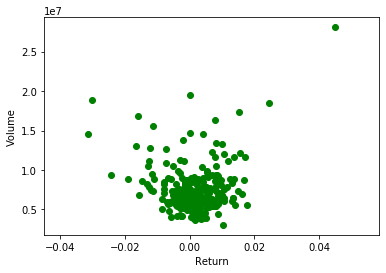

In [28]:
# Financial Services
get_cor_return_volume("V") #Visa

Correlation between return and volume of CCI is 0.17


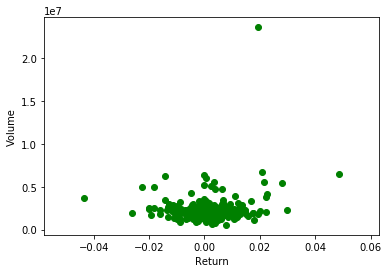

In [29]:
# Real Estate - недвижимость
get_cor_return_volume("CCI")

Correlation between return and volume of PSA is -0.29


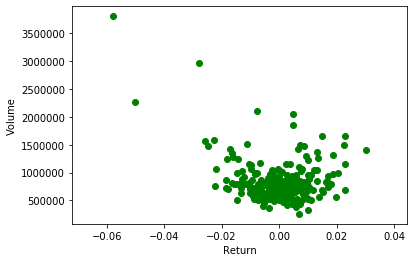

In [30]:
# Real Estate - недвижимость
get_cor_return_volume("PSA") # вкладываются в будущее?

Correlation between return and volume of PLD is -0.00


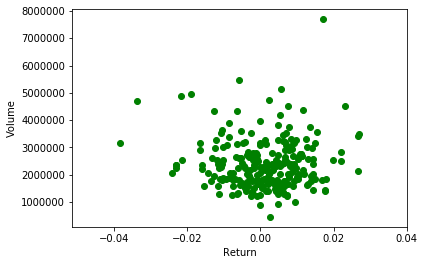

In [31]:
# Real Estate - недвижимость
get_cor_return_volume("PLD") 

# Task 6

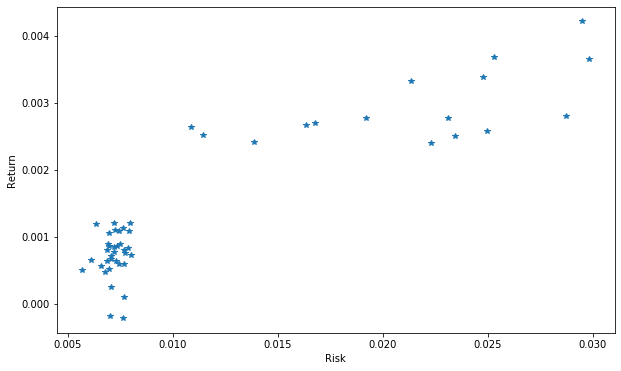

In [32]:
Tickers = find_good_actives(allRisks,allReturns,50)
plot_for_tickers(Tickers)

In [33]:
def covar_coefs(tic1,tic2):
    ret1 = allFrames[tic1]["Return"][1:]
    ret2 = allFrames[tic2]["Return"][1:]
    Rets = np.stack((ret1,ret2))
    Mat = np.cov(Rets)
    return np.cov(Rets)[0][1] #cov btw 1 and 2

C = [[covar_coefs(T2,T1) for T1 in Tickers] for T2 in Tickers]

In [34]:
# from scipy.optimize import linprog


# # def effective_front(E0):
# #C = [covar_coefs(T1,T2) for T1 in Tickers for T2 in Tickers]
# #C = np.array(C)

# C = [-1 * ]

# A_eq = np.array([[1 for i in range(50)]])
# b_eq = np.array([1])
# A_ub = []
# for ticker in Tickers:
#     E,_ = get_return_info(ticker)
#     A_ub.append(-1 * E)
    
# A_ub = np.array(A_ub).reshape(-1,1).T
# b_ub = [0]
# #bounds=[(None,None)]
# res = linprog(C, A_ub = A_ub, b_ub = b_ub,A_eq = A_eq,b_eq = b_eq)
    
    

In [35]:
# def simple_cull(inputPoints, dominates):
#     paretoPoints = set()
#     candidateRowNr = 0
#     dominatedPoints = set()
#     while True:
#         candidateRow = inputPoints[candidateRowNr]
#         inputPoints.remove(candidateRow)
#         rowNr = 0
#         nonDominated = True
#         while len(inputPoints) != 0 and rowNr < len(inputPoints):
#             row = inputPoints[rowNr]
#             if dominates(candidateRow, row):
#                 # If it is worse on all features remove the row from the array
#                 inputPoints.remove(row)
#                 dominatedPoints.add(tuple(row))
#             elif dominates(row, candidateRow):
#                 nonDominated = False
#                 dominatedPoints.add(tuple(candidateRow))
#                 rowNr += 1
#             else:
#                 rowNr += 1

#         if nonDominated:
#             # add the non-dominated point to the Pareto frontier
#             paretoPoints.add(tuple(candidateRow))

#         if len(inputPoints) == 0:
#             break
#     return paretoPoints, dominatedPoints

In [36]:
# def dominates(row, candidateRow):
#     return sum([row[0] <= candidateRow[0]] + [row[1] >= candidateRow[1]]) == len(row)

# inputPoints  = []
# for tick in Tickers:
#     x,y = get_return_info(tick)
#     inputPoints.append([y,x])


# paretoPoints, dominatedPoints = simple_cull(inputPoints, dominates)

# plt.figure(figsize=(10,6))
# for p in paretoPoints:
#     plt.scatter(*p,c='red')

# for p in dominatedPoints:
#     plt.scatter(*p,c='blue')
    
# paretoPoints = sorted(list(paretoPoints))    
# plt.plot([x for (x,y) in paretoPoints], [y for (x,y) in paretoPoints], c='red')

 https://cvxopt.org/userguide/coneprog.html#quadratic-programming
    
    cvxopt.solvers.qp(P, q[, G, h[, A, b[, solver[, initvals]]]])

    Solves the pair of primal and dual convex quadratic programs

    \begin{array}[t]{ll} \mbox{minimize} & (1/2) x^TPx + q^T x \\ \mbox{subject to} & Gx \preceq h \\ & Ax = b \end{array}



In [315]:
from cvxopt import matrix, solvers


lamb = 0.005
Q = 2*matrix(C)

G = []
for ticker in Tickers:
    E,_ = get_return_info(ticker)
    G.append(-1 * E)

p = matrix([lamb * G[i] for i in range(50)])


G = np.array(G).reshape(-1,1).T
G = matrix(G)
h = matrix(0.0)


A = np.array([1.0 for i in range(50)]).reshape(-1,1).T
A = matrix(A)
b = matrix(1.0)

sol=solvers.qp(Q, p, G, h, A, b)


     pcost       dcost       gap    pres   dres
 0:  2.6268e-06 -1.1788e-03  1e-03  1e-16  1e-02
 1:  2.6236e-06 -9.2182e-06  1e-05  1e-17  1e-04
 2:  2.5504e-06  2.4220e-06  1e-07  4e-16  5e-06
 3:  2.5451e-06  2.5438e-06  1e-09  3e-16  5e-08
Optimal solution found.


In [316]:
#print(sol)


In [317]:
X = []
for i in sol['x']:
    X.append(i)

In [318]:
Es = []
for ticker in Tickers:
    E,_ = get_return_info(ticker)
    Es.append(E)

In [319]:
#Доходность портфеля
Rp = sum([X[i]*Es[i] for i in range(50)])
#Ковариация
sigma2 = []
for i in range(50):
    for j in range(50):
        sigma2.append(X[i]*X[j]* C[i][j])
sigma2 = sum(sigma2)

print(Rp,sigma2)

0.0013193133400168475 9.141688846410019e-06


In [320]:
lambd = [Rp,sigma2]
lambdas.append(lambd)

In [321]:
lambdas.append(lambd)
print(lambdas)

[[0.0007345712035010678, 7.681323587236899e-06], [0.0008515112039383687, 7.739516722529012e-06], [0.0009684562432519013, 7.914638826132529e-06], [0.0010854054518249063, 8.2067024060919e-06], [0.0012023580401950011, 8.615716813248105e-06], [0.0013193133400168475, 9.141688846410019e-06]]


In [38]:
from cvxopt import matrix, solvers


lambdas2=[]
for i in range(0,1000,5):
    lambd = i / 1000
    print("lambda {}\n\n".format(lambd))
    
    Q = 2*matrix(C)
    G = []
    for ticker in Tickers:
        E,_ = get_return_info(ticker)
        G.append(-1 * E)

    p = matrix([lambd * G[i] for i in range(50)])


    G = np.array(G).reshape(-1,1).T
    G = matrix(G)
    h = matrix(0.0)


    A = np.array([1.0 for i in range(50)]).reshape(-1,1).T
    A = matrix(A)
    b = matrix(1.0)

    sol=solvers.qp(Q, p, G, h, A, b)
    X = []
    for i in sol['x']:
        X.append(i)
        
    Es = []
    for ticker in Tickers:
        E,_ = get_return_info(ticker)
        Es.append(E)
    #Доходность портфеля
    Rp = sum([X[i]*Es[i] for i in range(50)])
#Ковариация
    sigma2 = []
    for i in range(50):
        for j in range(50):
            sigma2.append(X[i]*X[j]* C[i][j])
    sigma2 = sum(sigma2)

    print(Rp,sigma2)
    lambd2 = [Rp,sigma2]
    lambdas2.append(lambd2)

lambda 0.0


     pcost       dcost       gap    pres   dres
 0:  7.7066e-06 -6.5018e-04  7e-04  1e-16  1e-02
 1:  7.7061e-06  1.1187e-06  7e-06  1e-16  1e-04
 2:  7.6857e-06  7.6154e-06  7e-08  2e-16  5e-06
 3:  7.6813e-06  7.6806e-06  7e-10  1e-17  4e-08
Optimal solution found.
0.0007345712035010678 7.681323587236899e-06
lambda 0.005


     pcost       dcost       gap    pres   dres
 0:  2.6268e-06 -1.1788e-03  1e-03  1e-16  1e-02
 1:  2.6236e-06 -9.2182e-06  1e-05  1e-17  1e-04
 2:  2.5504e-06  2.4220e-06  1e-07  4e-16  5e-06
 3:  2.5451e-06  2.5438e-06  1e-09  3e-16  5e-08
Optimal solution found.
0.0013193133400168475 9.141688846410019e-06
lambda 0.01


     pcost       dcost       gap    pres   dres
 0: -5.3451e-06 -1.7104e-03  2e-03  2e-16  1e-02
 1: -5.3546e-06 -2.2461e-05  2e-05  2e-16  1e-04
 2: -5.5101e-06 -5.6971e-06  2e-07  3e-16  5e-06
 3: -5.5151e-06 -5.5170e-06  2e-09  3e-16  5e-08
Optimal solution found.
0.0019041146573056953 1.3526039605438717e-05
lambda 0.015


     p

<function matplotlib.pyplot.show(*args, **kw)>

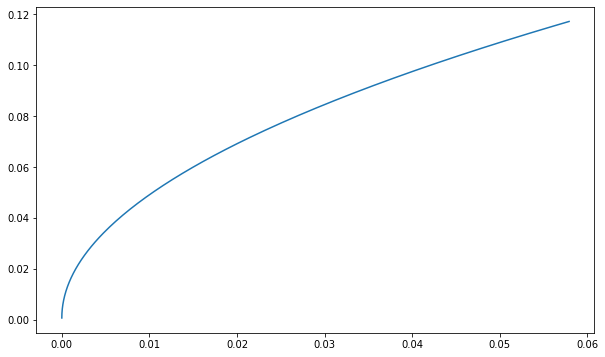

In [39]:
plt.figure(figsize=(10,6))
Xes = [X for [Y,X] in lambdas2]
Yes = [Y for [Y,X] in lambdas2]
plt.plot(Xes,Yes)
plt.show

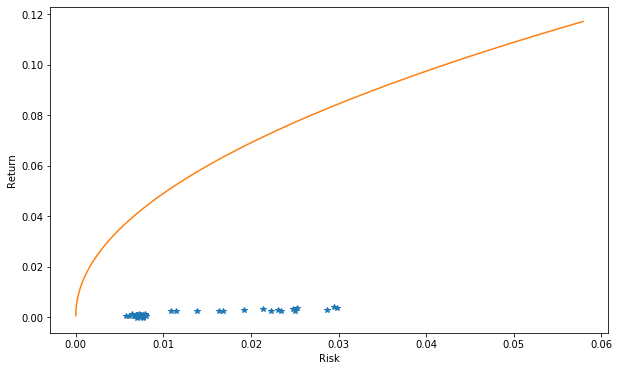

In [40]:
rets=[]
risks=[]
for tick in Tickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)

plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes,Yes)
plt.show()

In [75]:
from cvxopt import matrix, solvers


lambdas3=[]
for i in range(0,10000,5):
    lambd = i / 1000
    print("lambda {}\n\n".format(lambd))
    
    Q = 2*matrix(C)
    G = []
    for ticker in Tickers:
        E,_ = get_return_info(ticker)
        G.append(-1 * E)

    p = matrix([lambd * G[i] for i in range(50)])
    
    G = [G] + np.diag([-1.0 for i in range(50)]).tolist()
    G = np.array(G).reshape(51,50)
    G = matrix(G)
    h = matrix([0.0 for i in range(51)])


    A = np.array([1.0 for i in range(50)]).reshape(-1,1).T
    A = matrix(A)
    b = matrix(1.0)

    sol=solvers.qp(Q, p, G, h, A, b)
    X = []
    for i in sol['x']:
        X.append(i)
        
    Es = []
    for ticker in Tickers:
        E,_ = get_return_info(ticker)
        Es.append(E)
    #Доходность портфеля
    Rp = sum([X[i]*Es[i] for i in range(50)])
#Ковариация
    sigma2 = []
    for i in range(50):
        for j in range(50):
            sigma2.append(X[i]*X[j]* C[i][j])
    sigma2 = sum(sigma2)

    print(Rp,sigma2)
    lambd3 = [Rp,sigma2]
    lambdas3.append(lambd3)

lambda 0.0


     pcost       dcost       gap    pres   dres
 0:  2.0105e-05 -1.0015e+00  1e+00  3e-16  7e+00
 1:  2.0104e-05 -1.0025e-02  1e-02  2e-16  7e-02
 2:  1.9941e-05 -1.1061e-04  1e-04  6e-17  9e-04
 3:  1.5556e-05 -4.8645e-06  2e-05  3e-16  1e-04
 4:  1.0883e-05 -1.8346e-06  1e-05  9e-17  7e-20
 5:  1.0122e-05  6.8639e-06  3e-06  4e-16  5e-20
 6:  9.4829e-06  8.9276e-06  6e-07  3e-16  3e-20
 7:  9.2970e-06  9.2479e-06  5e-08  7e-17  3e-20
Optimal solution found.
0.0008016084734105588 9.296999864539185e-06
lambda 0.005


     pcost       dcost       gap    pres   dres
 0:  1.2954e-05 -1.0015e+00  1e+00  2e-16  7e+00
 1:  1.2953e-05 -1.0028e-02  1e-02  2e-16  7e-02
 2:  1.2838e-05 -1.1318e-04  1e-04  2e-16  9e-04
 3:  9.6069e-06 -8.1746e-06  2e-05  3e-17  1e-04
 4:  6.0095e-06 -4.8893e-06  1e-05  2e-16  6e-20
 5:  5.1744e-06  2.7607e-06  2e-06  9e-17  3e-20
 6:  4.6243e-06  4.3477e-06  3e-07  2e-16  3e-20
 7:  4.5075e-06  4.4890e-06  2e-08  7e-17  3e-20
Optimal solution found.


<function matplotlib.pyplot.show(*args, **kw)>

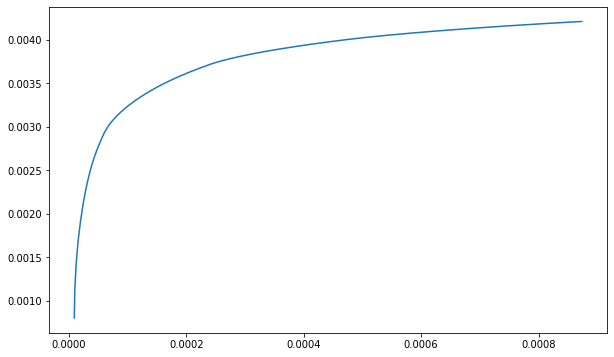

In [76]:
plt.figure(figsize=(10,6))
Xes3 = [X for [Y,X] in lambdas3]
Yes3 = [Y for [Y,X] in lambdas3]
plt.plot(Xes3,Yes3)
plt.show

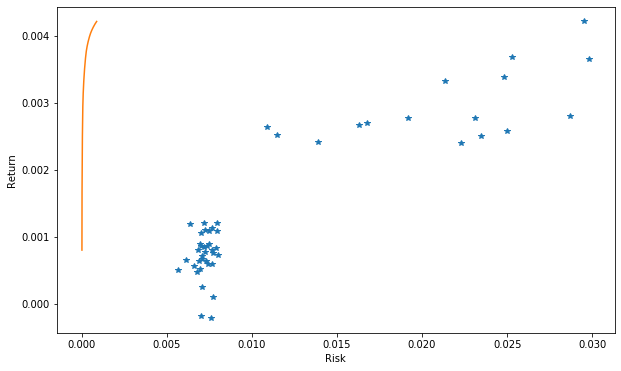

In [77]:
rets=[]
risks=[]
for tick in Tickers:
    ret,risk = get_return_info(tick)
    rets.append(ret)
    risks.append(risk)

plt.figure(figsize=(10,6))
plt.xlabel("Risk")
plt.ylabel("Return")
plt.plot(risks, rets,"*")
plt.plot(Xes3,Yes3)
plt.show()